## Zoe Markovits, Dan Grenell 
## CSC 84020 HW2

## San Francisco Crime Data: https://www.kaggle.com/c/sf-crime/

Outline:
1. Import Dataset and Descriptive Statistics
2. Inital Deep Learning Multilayerd Perceptron
3. Training, Prediction

    A. RMS Prop 
        1. Mini Batches
        2. Batch Normalization
        3. Mini Batches and Batch Normalization
    B. RMS Prop with Momentum 
        1. Mini Batches
        2. Batch Normalization
        3. Mini Batches and Batch Normalization
    C. AdaMax
        1. Mini Batches
        2. Batch Normalization
        3. Mini Batches and Batch Normalization
4. Improve the Learning

### 1. Import Dataset and Descriptive Statistics

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import tkinter
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 40)
%matplotlib inline

In [2]:
df = pd.read_csv('sf-crime.csv')

In [3]:
#url1 = "https://raw.githubusercontent.com/ZoeMarkovits/Neural_Networks_HW2/master/1.csv"
#url2 = "https://raw.githubusercontent.com/ZoeMarkovits/Neural_Networks_HW2/master/2.csv"

#df1 = pd.read_csv(url1)
#df2 = pd.read_csv(url2)

#df = pd.concat([df1, df2])

In [4]:
print(df.shape)
df.info()

(878049, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [5]:
from pandas_profiling import ProfileReport as pfr
pfr(df)

Number of variables,9
Number of observations,878049
Total Missing (%),0.0%
Total size in memory,60.3 MiB
Average record size in memory,72.0 B
Numeric,2
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [6]:
df.head(25)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [7]:
df.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

Text(0.5, 1.0, 'Counts of Crime Categories')

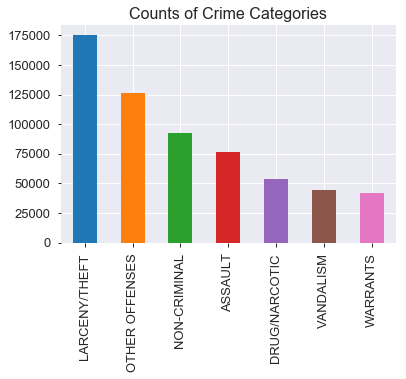

In [100]:
category_counts = df.Category.value_counts()

ax = plt.figure()
category_counts.plot(kind = 'bar', fontsize=13)
plt.title('Counts of Crime Categories', fontsize=16)

In [9]:
df = df[df['Category'].isin(['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT',
                             'DRUG/NARCOTIC','VANDALISM','WARRANTS'])]

Text(0.5, 1.0, 'Counts of Limited Crime Categories')

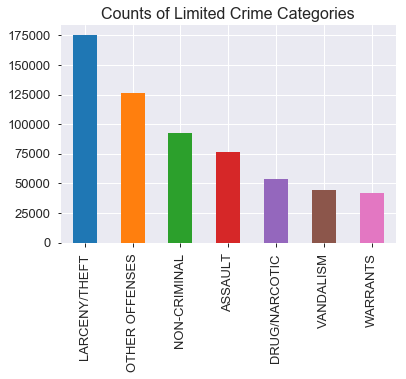

In [101]:
new_category_counts = df.Category.value_counts()

ax = plt.figure()
new_category_counts.plot(kind = 'bar', fontsize=13)
plt.title('Counts of Limited Crime Categories', fontsize=16)

In [11]:
df['Datetime'] = pd.to_datetime(df['Dates'])

In [12]:
df['Hour'] = df['Datetime'].dt.hour/24
df['Month'] = df['Datetime'].dt.month/12

In [13]:
dayofweek_dummies = pd.get_dummies(df.DayOfWeek,drop_first=False).astype(int)
district_dummies = pd.get_dummies(df.PdDistrict,drop_first=False).astype(int)
resolution_dummies = pd.get_dummies(df.Resolution,drop_first=False).astype(int)
df = pd.concat([df,dayofweek_dummies,district_dummies,resolution_dummies],axis=1)  

In [14]:
x_iter = [i/100 for i in list(range(-12252, -12236, 2))]
y_iter = [i/100 for i in list(range(3770, 3786, 2))]

df['Location_Box'] = 0

iterator = 0
for x in x_iter:
    iterator+=1
    for y in y_iter:
        df.loc[(df['X'] > x) & (df['Y'] > y),'Location_Box'] = iterator
        iterator+=1

df.Location_Box /= max(df.Location_Box)

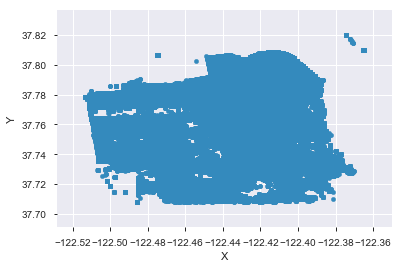

In [102]:
df[df['Y']<80].plot(kind='scatter', x='X', y='Y')

df = df[df['Y']<80]

In [16]:
df = df.drop(['Dates','DayOfWeek','PdDistrict','Resolution','Address'], axis=1)

In [17]:
df.Category.value_counts()

LARCENY/THEFT     174885
OTHER OFFENSES    126165
NON-CRIMINAL       92300
ASSAULT            76872
DRUG/NARCOTIC      53971
VANDALISM          44724
WARRANTS           42206
Name: Category, dtype: int64

In [18]:
df['Numerical_Category'] = df['Category'].map({'LARCENY/THEFT':1,
                                             'OTHER OFFENSES':2,
                                             'NON-CRIMINAL':3,
                                             'ASSAULT':4,
                                             'DRUG/NARCOTIC':5,
                                             'VANDALISM':6,
                                             'WARRANTS':7})

In [19]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

In [20]:
df.shape

(611123, 43)

In [21]:
df.head(10)

,Numerical_Category,Category,Descript,X,Y,Datetime,Hour,Month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,...,TARAVAL,TENDERLOIN,"ARREST, BOOKED","ARREST, CITED",CLEARED-CONTACT JUVENILE FOR MORE INFO,COMPLAINANT REFUSES TO PROSECUTE,DISTRICT ATTORNEY REFUSES TO PROSECUTE,EXCEPTIONAL CLEARANCE,JUVENILE ADMONISHED,JUVENILE BOOKED,JUVENILE CITED,JUVENILE DIVERTED,LOCATED,NONE,NOT PROSECUTED,PROSECUTED BY OUTSIDE AGENCY,PROSECUTED FOR LESSER OFFENSE,PSYCHOPATHIC CASE,UNFOUNDED,Location_Box
0,7,WARRANTS,WARRANT ARREST,-122.425892,37.774599,2015-05-13 23:53:00,0.958333,0.416667,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.563380
1,2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,-122.425892,37.774599,2015-05-13 23:53:00,0.958333,0.416667,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.563380
2,2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,-122.424363,37.800414,2015-05-13 23:33:00,0.958333,0.416667,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.591549
3,1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,-122.426995,37.800873,2015-05-13 23:30:00,0.958333,0.416667,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.591549
4,1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,-122.438738,37.771541,2015-05-13 23:30:00,0.958333,0.416667,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.563380
5,1,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,-122.403252,37.713431,2015-05-13 23:30:00,0.958333,0.416667,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.647887
8,1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,-122.508194,37.776601,2015-05-13 23:00:00,0.958333,0.416667,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.056338
9,1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,-122.419088,37.807802,2015-05-13 23:00:00,0.958333,0.416667,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.718310
10,1,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,-122.419088,37.807802,2015-05-13 22:58:00,0.916667,0.416667,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.718310
11,2,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,-122.487983,37.737667,2015-05-13 22:30:00,0.916667,0.416667,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.154930


#### Split Data Into Train and Test

In [22]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
X = df.drop(['Numerical_Category','Category','Descript','Datetime', 'X', 'Y'], axis=1)
X = X.values

y = df['Numerical_Category']
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [24]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_train = y_train[:,1:]

y_test = to_categorical(y_test)
y_test = y_test[:,1:]

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

### 2. Initial Multilayered Perceptron 

In [25]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.activations import relu
from keras import optimizers
from keras.initializers import constant, glorot_normal, random_normal, he_uniform

from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

Using Theano backend.


In [26]:
def build_model(dropout = 0.2, BatchNorm = False, initializer=random_normal() ,layer_widths = [64, 64, 64, 128, 128, 128]):
    if BatchNorm:
        model = Sequential()

        model.add(Dense(layer_widths[0], input_dim = X_train.shape[1], kernel_initializer=initializer, bias_initializer=initializer))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[1], kernel_initializer=initializer, bias_initializer=initializer))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[2], kernel_initializer=initializer, bias_initializer=initializer))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[3]))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[4]))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[5]))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(7))
        model.add(Activation('softmax'))
    else:
        model = Sequential()

        model.add(Dense(layer_widths[0], input_dim = X_train.shape[1], kernel_initializer=initializer, bias_initializer=initializer))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[1], kernel_initializer=initializer, bias_initializer=initializer))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[2], kernel_initializer=initializer, bias_initializer=initializer))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[3]))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[4]))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(layer_widths[5]))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(7))
        model.add(Activation('softmax'))
        
    return model

def compile_fit_model(model, X_train=X_train, y_train=y_train, batchsize = None, epoch=5, optimize='sgd'):
    model.compile(loss='categorical_crossentropy', optimizer=optimize, metrics=['accuracy'])
    
    return model.fit(X_train, y_train, epochs=epoch, verbose=1, validation_split=0.1, batch_size = batchsize)    

def evaluate_model(model, X_test=X_test, y_test=y_test):
    return model.evaluate(X_test, y_test)

def kfold(model, X_train=X_train, y_train=y_train, splits=5, optimize = 'sgd', epoch=4, batchsize=256):
    cvscores = []
    kf = KFold(n_splits=splits)
    k = 1
    accuracy = []
    loss = []
    for train_i, val_i in kf.split(X_train, [np.argmax(t) for t in y_train]):
        print(f"\nFold {k}")
        k += 1
        history = compile_fit_model(model, X_train[train_i], y_train[train_i], batchsize=batchsize, optimize=optimize, epoch=epoch)
        _, cvaccuracy = evaluate_model(model, X_train[val_i], y_train[val_i])
        accuracy.extend(history.history['acc'])
        loss.extend(history.history['loss'])
        cvscores.append(cvaccuracy)
    return accuracy, loss, cvscores, np.mean(cvscores), np.std(cvscores)

In [27]:
def plot_metrics(accuracy, loss, epochs, model_name = "Model Name"):
    epochs = len(accuracy)
    
    fig = plt.figure(figsize=(15,5))
    
    ax1 = plt.subplot(121)
    ax1.set_title(f'Training Accuracy for {model_name}')
    ax1.plot(list(range(50)), accuracy, label = 'training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(list(range(0, epochs + 1, 5)))
    
    ax2 = plt.subplot(122)
    ax2.set_title(f'Training Loss for {model_name}')
    ax2.plot(list(range(50)), loss, color='orange', label = 'training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(list(range(0, epochs + 1, 5)))
    return plt.show()

In [28]:
def roc_maker(y_preds, model_name = "Model Name"):
    # y_preds should be the class predictions from a model like y_preds = baseline_model.predict(X_test)
    n_classes = y_preds.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(1)
    colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive', 'tab:pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right", bbox_to_anchor=(1.8, 0.2))
    return plt.show()

#### First Baseline Model with SGD Optimizer

In [29]:
baseline_model = build_model()

In [30]:
baseline_accuracy, baseline_loss, *_ = kfold(baseline_model, batchsize=None)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/4
308005/308005 [==============================] - 22s 72us/step - loss: 1.6215 - acc: 0.3775 - val_loss: 1.4886 - val_acc: 0.4172
Epoch 2/4
308005/308005 [==============================] - 21s 67us/step - loss: 1.5051 - acc: 0.4103 - val_loss: 1.4762 - val_acc: 0.4172
Epoch 3/4
308005/308005 [==============================] - 21s 67us/step - loss: 1.4905 - acc: 0.4139 - val_loss: 1.4580 - val_acc: 0.4444
Epoch 4/4
85558/85558 [==============================] - 2s 29us/step

Fold 2
Train on 308006 samples, validate on 34223 samples
Epoch 1/4
308006/308006 [==============================] - 21s 68us/step - loss: 1.4568 - acc: 0.4376 - val_loss: 1.4346 - val_acc: 0.4443
Epoch 2/4
308006/308006 [==============================] - 21s 68us/step - loss: 1.4530 - acc: 0.4385 - val_loss: 1.4333 - val_acc: 0.4453
Epoch 3/4
308006/308006 [==============================] - 21s 69us/step - loss: 1.4500 - acc: 0.4394 - val_loss: 1.4

#### Baseline Model with 10 Epochs

In [31]:
baseline_model = build_model()

In [32]:
baseline_two_accuracy, baseline_two_loss, *_ = kfold(baseline_model, epoch=10, batchsize=None)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 21s 69us/step - loss: 1.6341 - acc: 0.3742 - val_loss: 1.4990 - val_acc: 0.4173
Epoch 2/10
308005/308005 [==============================] - 21s 69us/step - loss: 1.5084 - acc: 0.4111 - val_loss: 1.4766 - val_acc: 0.4220
Epoch 3/10
308005/308005 [==============================] - 21s 69us/step - loss: 1.4941 - acc: 0.4123 - val_loss: 1.4709 - val_acc: 0.4193
Epoch 4/10
308005/308005 [==============================] - 22s 71us/step - loss: 1.4879 - acc: 0.4132 - val_loss: 1.4664 - val_acc: 0.4200
Epoch 5/10
308005/308005 [==============================] - 22s 70us/step - loss: 1.4818 - acc: 0.4193 - val_loss: 1.4508 - val_acc: 0.4500
Epoch 6/10
308005/308005 [==============================] - 22s 71us/step - loss: 1.4637 - acc: 0.4411 - val_loss: 1.4318 - val_acc: 0.4512
Epoch 7/10
308005/308005 [==============================] - 22s 71us/step - loss: 1.4516 - acc: 0.443

In [33]:
import tkinter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

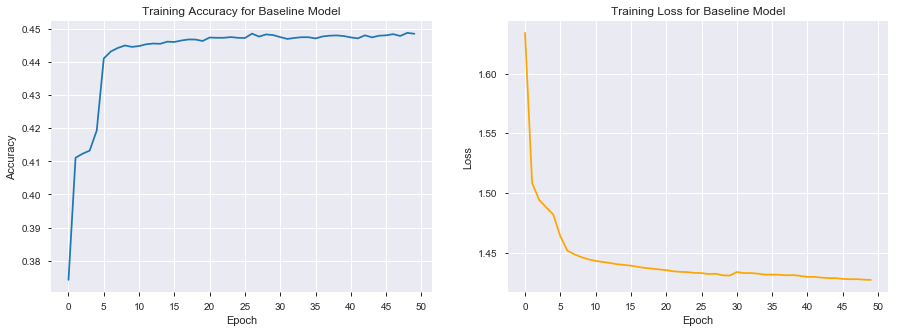

In [34]:
plot_metrics(baseline_two_accuracy, baseline_two_loss, epochs=10, model_name = "Baseline Model")

#### Initializer Testing
#### Initializers: Glorot Normal, Random Normal,  He Uniform, Constant Values 0 and 1

1. Glorot Normal

In [35]:
initializer_one = build_model(initializer=glorot_normal())

In [36]:
initializer_one_accuracy, initializer_one_loss, *_ = kfold(initializer_one, optimize = 'rmsprop')


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/4
308005/308005 [==============================] - 10s 34us/step - loss: 1.4887 - acc: 0.4297 - val_loss: 1.4440 - val_acc: 0.4505
Epoch 2/4
308005/308005 [==============================] - 10s 33us/step - loss: 1.4447 - acc: 0.4467 - val_loss: 1.4211 - val_acc: 0.4543
Epoch 3/4
308005/308005 [==============================] - 10s 34us/step - loss: 1.4372 - acc: 0.4479 - val_loss: 1.4152 - val_acc: 0.4541
Epoch 4/4
85558/85558 [==============================] - 3s 31us/step

Fold 2
Train on 308006 samples, validate on 34223 samples
Epoch 1/4
308006/308006 [==============================] - 11s 34us/step - loss: 1.4307 - acc: 0.4488 - val_loss: 1.4127 - val_acc: 0.4547
Epoch 2/4
308006/308006 [==============================] - 10s 33us/step - loss: 1.4292 - acc: 0.4498 - val_loss: 1.4095 - val_acc: 0.4570
Epoch 3/4
308006/308006 [==============================] - 11s 36us/step - loss: 1.4277 - acc: 0.4494 - val_loss: 1.4

2. Random Normal

In [37]:
initializer_two = build_model(initializer=random_normal())

In [38]:
initializer_two_accuracy, initializer_two_loss, *_ = kfold(initializer_two, optimize = 'rmsprop')


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/4
308005/308005 [==============================] - 11s 34us/step - loss: 1.4755 - acc: 0.4306 - val_loss: 1.4319 - val_acc: 0.4533
Epoch 2/4
308005/308005 [==============================] - 10s 34us/step - loss: 1.4385 - acc: 0.4472 - val_loss: 1.4168 - val_acc: 0.4560
Epoch 3/4
308005/308005 [==============================] - 11s 35us/step - loss: 1.4317 - acc: 0.4490 - val_loss: 1.4109 - val_acc: 0.4560
Epoch 4/4
85558/85558 [==============================] - 3s 31us/step

Fold 2
Train on 308006 samples, validate on 34223 samples
Epoch 1/4
308006/308006 [==============================] - 10s 34us/step - loss: 1.4254 - acc: 0.4507 - val_loss: 1.4076 - val_acc: 0.4597
Epoch 2/4
308006/308006 [==============================] - 11s 34us/step - loss: 1.4236 - acc: 0.4502 - val_loss: 1.4062 - val_acc: 0.4545
Epoch 3/4
308006/308006 [==============================] - 11s 34us/step - loss: 1.4229 - acc: 0.4512 - val_loss: 1.4

3. He Uniform

In [39]:
initializer_three = build_model(initializer=he_uniform())

In [40]:
initializer_three_accuracy, initializer_three_loss, *_ = kfold(initializer_three, optimize = 'rmsprop')


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/4
308005/308005 [==============================] - 19s 63us/step - loss: 1.4967 - acc: 0.4276 - val_loss: 1.4575 - val_acc: 0.4522
Epoch 2/4
308005/308005 [==============================] - 14s 44us/step - loss: 1.4484 - acc: 0.4453 - val_loss: 1.4331 - val_acc: 0.4551
Epoch 3/4
308005/308005 [==============================] - 10s 34us/step - loss: 1.4403 - acc: 0.4477 - val_loss: 1.4233 - val_acc: 0.4564
Epoch 4/4
85558/85558 [==============================] - 3s 36us/step

Fold 2
Train on 308006 samples, validate on 34223 samples
Epoch 1/4
308006/308006 [==============================] - 11s 37us/step - loss: 1.4356 - acc: 0.4484 - val_loss: 1.4164 - val_acc: 0.4566
Epoch 2/4
308006/308006 [==============================] - 11s 37us/step - loss: 1.4340 - acc: 0.4490 - val_loss: 1.4104 - val_acc: 0.4570
Epoch 3/4
308006/308006 [==============================] - 10s 33us/step - loss: 1.4327 - acc: 0.4489 - val_loss: 1.4

4. Constant Value 0

In [41]:
initializer_four = build_model(initializer=constant(value=0))

In [42]:
initializer_four_accuracy, initializer_four_loss, *_ = kfold(initializer_four, optimize = 'rmsprop')


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/4
308005/308005 [==============================] - 11s 37us/step - loss: 1.8233 - acc: 0.2866 - val_loss: 1.8174 - val_acc: 0.2887
Epoch 2/4
308005/308005 [==============================] - 13s 41us/step - loss: 1.8216 - acc: 0.2866 - val_loss: 1.8172 - val_acc: 0.2887
Epoch 3/4
308005/308005 [==============================] - 13s 43us/step - loss: 1.8212 - acc: 0.2866 - val_loss: 1.8175 - val_acc: 0.2887
Epoch 4/4
85558/85558 [==============================] - 3s 30us/step

Fold 2
Train on 308006 samples, validate on 34223 samples
Epoch 1/4
308006/308006 [==============================] - 12s 38us/step - loss: 1.8209 - acc: 0.2857 - val_loss: 1.8173 - val_acc: 0.2887
Epoch 2/4
308006/308006 [==============================] - 12s 38us/step - loss: 1.8208 - acc: 0.2857 - val_loss: 1.8171 - val_acc: 0.2887
Epoch 3/4
308006/308006 [==============================] - 12s 38us/step - loss: 1.8207 - acc: 0.2857 - val_loss: 1.8

5. Constant Value 1

In [43]:
initializer_five = build_model(initializer=constant(value=1))

In [44]:
initializer_five_accuracy, initializer_five_loss, *_ = kfold(initializer_five, optimize = 'rmsprop')


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/4
308005/308005 [==============================] - 11s 34us/step - loss: 12.1885 - acc: 0.2438 - val_loss: 11.4649 - val_acc: 0.2887
Epoch 2/4
308005/308005 [==============================] - 12s 39us/step - loss: 11.4992 - acc: 0.2866 - val_loss: 11.4649 - val_acc: 0.2887
Epoch 3/4
308005/308005 [==============================] - 13s 42us/step - loss: 11.4983 - acc: 0.2866 - val_loss: 11.4649 - val_acc: 0.2887
Epoch 4/4
85558/85558 [==============================] - 3s 33us/step

Fold 2
Train on 308006 samples, validate on 34223 samples
Epoch 1/4
308006/308006 [==============================] - 10s 32us/step - loss: 11.5131 - acc: 0.2857 - val_loss: 11.4649 - val_acc: 0.2887
Epoch 2/4
308006/308006 [==============================] - 10s 32us/step - loss: 11.5132 - acc: 0.2857 - val_loss: 11.4649 - val_acc: 0.2887
Epoch 3/4
308006/308006 [==============================] - 10s 33us/step - loss: 11.5134 - acc: 0.2857 - va

We can see that Random Normal gives us the highest accuracy of all five optimizers and we set it as our default value in our build_model function.

### 3. Training and Prediction

### 3a. RMS Prop Optimizer

#### 3a. 1. Multilayer Perceptron with RMS Prop Optimizer and K-Cross Validation, Mini-Batches

In [45]:
three_a_one_model = build_model()

In [46]:
three_a_one_accuracy, three_a_one_loss, *_ = kfold(three_a_one_model, optimize = 'rmsprop', epoch=10)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 10s 34us/step - loss: 1.4795 - acc: 0.4306 - val_loss: 1.4253 - val_acc: 0.4547
Epoch 2/10
308005/308005 [==============================] - 10s 32us/step - loss: 1.4395 - acc: 0.4474 - val_loss: 1.4231 - val_acc: 0.4562
Epoch 3/10
308005/308005 [==============================] - 10s 32us/step - loss: 1.4328 - acc: 0.4488 - val_loss: 1.4148 - val_acc: 0.4552
Epoch 4/10
308005/308005 [==============================] - 10s 34us/step - loss: 1.4293 - acc: 0.4499 - val_loss: 1.4099 - val_acc: 0.4565
Epoch 5/10
308005/308005 [==============================] - 10s 32us/step - loss: 1.4253 - acc: 0.4509 - val_loss: 1.4103 - val_acc: 0.4560
Epoch 6/10
308005/308005 [==============================] - 10s 33us/step - loss: 1.4239 - acc: 0.4514 - val_loss: 1.4032 - val_acc: 0.4575
Epoch 7/10
308005/308005 [==============================] - 10s 32us/step - loss: 1.4229 - acc: 0.451

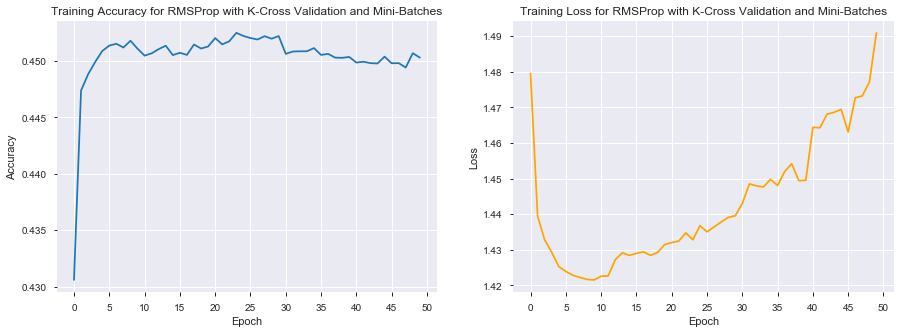

In [47]:
plot_metrics(three_a_one_accuracy, three_a_one_loss, epochs=10, 
             model_name = "RMSProp with K-Cross Validation and Mini-Batches")

In [48]:
three_a_one_model.predict(X_test)[0]

array([0.45764333, 0.10307547, 0.20072077, 0.09609999, 0.00608912,
       0.13348697, 0.00288436], dtype=float32)

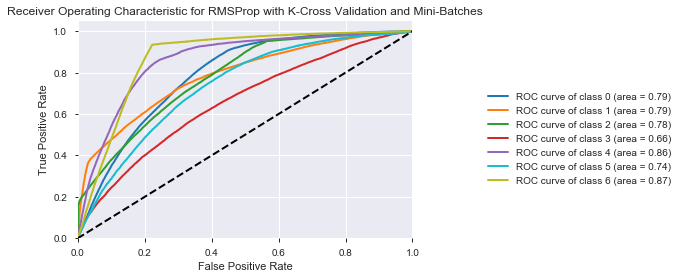

In [49]:
y_preds = three_a_one_model.predict(X_test)
roc_maker(y_preds, model_name="RMSProp with K-Cross Validation and Mini-Batches")

In [50]:
print("RMSProp with K-Cross Validation and Mini-Batches Confusion Matrix:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

RMSProp with K-Cross Validation and Mini-Batches Confusion Matrix:
 [[47167  1990   192   457   912     0  1683]
 [10082 16794   294  1135  4644     0  4788]
 [20669   732  5055   612   335     0   369]
 [13377  2984   279  1959  1859     0  2790]
 [ 1432  2929    50   370  7045     0  4410]
 [11600   826   107   240   210     0   327]
 [  629  2177    25   561  4199     0  5042]]


#### 3a. 2. Multilayer Perceptron with RMS Prop Optimizer and K-Cross Validation, Batch Normalization

In [51]:
three_a_two_model = build_model(BatchNorm = True)

In [52]:
three_a_two_accuracy, three_a_two_loss, *_ = kfold(three_a_two_model, optimize = 'rmsprop', epoch=10, batchsize=None)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 47s 152us/step - loss: 1.4778 - acc: 0.4385 - val_loss: 1.4190 - val_acc: 0.4559
Epoch 2/10
308005/308005 [==============================] - 50s 162us/step - loss: 1.4517 - acc: 0.4469 - val_loss: 1.4172 - val_acc: 0.4526
Epoch 3/10
308005/308005 [==============================] - 51s 165us/step - loss: 1.4494 - acc: 0.4471 - val_loss: 1.4162 - val_acc: 0.4554
Epoch 4/10
308005/308005 [==============================] - 58s 187us/step - loss: 1.4489 - acc: 0.4476 - val_loss: 1.4164 - val_acc: 0.4550
Epoch 5/10
308005/308005 [==============================] - 49s 158us/step - loss: 1.4475 - acc: 0.4468 - val_loss: 1.4176 - val_acc: 0.4552
Epoch 6/10
308005/308005 [==============================] - 50s 162us/step - loss: 1.4483 - acc: 0.4469 - val_loss: 1.4163 - val_acc: 0.4547
Epoch 7/10
308005/308005 [==============================] - 54s 175us/step - loss: 1.4476 - acc

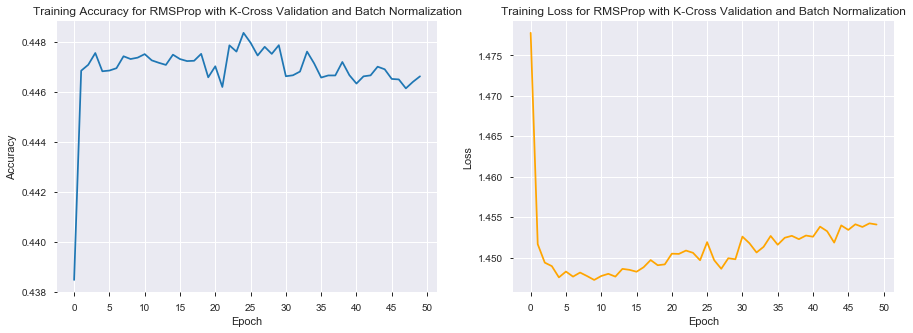

In [53]:
plot_metrics(three_a_two_accuracy, three_a_two_loss, epochs=10, 
             model_name = "RMSProp with K-Cross Validation and Batch Normalization")

In [54]:
three_a_two_model.predict(X_test)[0]

array([0.5176509 , 0.09414846, 0.18497421, 0.09105691, 0.0107989 ,
       0.09898831, 0.0023823 ], dtype=float32)

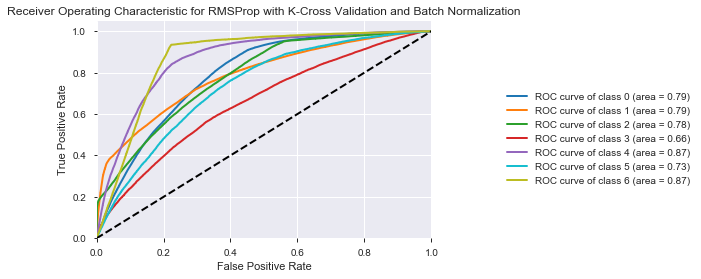

In [55]:
y_preds = three_a_two_model.predict(X_test)
roc_maker(y_preds, model_name="RMSProp with K-Cross Validation and Batch Normalization")

In [56]:
print("RMSProp with K-Cross Validation and Batch Normalization Confusion Matrix:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

RMSProp with K-Cross Validation and Batch Normalization Confusion Matrix:
 [[47383  1919   199   226  1535     0  1139]
 [10194 16245   328   442  5234     0  5294]
 [20867   662  5088   371   382     0   402]
 [13629  3095   282  1055  1898     0  3289]
 [ 1462  2453    48    65  7887     0  4321]
 [11670   755   109   124   218     0   434]
 [  635  1722    28   114  5125     0  5009]]


#### 3a. 3. Multilayer Perceptron with RMS Prop Optimizer and K-Cross Validation, Mini-Batches, and Batch Normalization

In [57]:
three_a_three_model = build_model(BatchNorm = True)

In [58]:
three_a_three_accuracy, three_a_three_loss, *_ = kfold(three_a_three_model, optimize = 'rmsprop', epoch=10)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 21s 67us/step - loss: 1.4804 - acc: 0.4360 - val_loss: 1.4148 - val_acc: 0.4546
Epoch 2/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4337 - acc: 0.4493 - val_loss: 1.4073 - val_acc: 0.4577
Epoch 3/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4255 - acc: 0.4512 - val_loss: 1.4018 - val_acc: 0.4583
Epoch 4/10
308005/308005 [==============================] - 21s 68us/step - loss: 1.4226 - acc: 0.4508 - val_loss: 1.4027 - val_acc: 0.4568
Epoch 5/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4202 - acc: 0.4512 - val_loss: 1.3981 - val_acc: 0.4563
Epoch 6/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4181 - acc: 0.4520 - val_loss: 1.3963 - val_acc: 0.4579
Epoch 7/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4162 - acc: 0.452

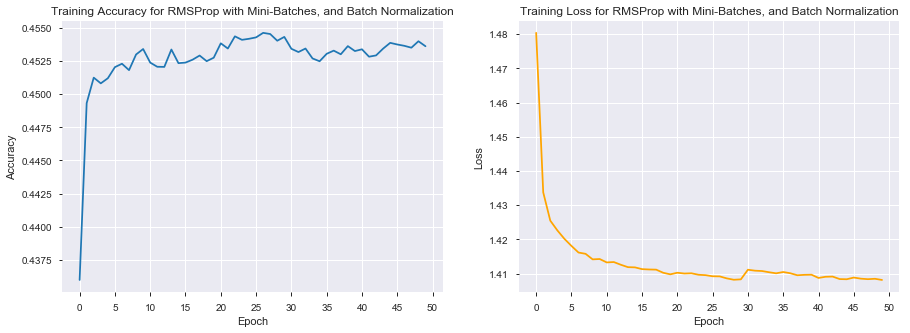

In [59]:
plot_metrics(three_a_three_accuracy, three_a_three_loss, epochs=10, 
             model_name = "RMSProp with Mini-Batches, and Batch Normalization")

In [60]:
three_a_three_model.predict(X_test)[0]

array([0.51960784, 0.07646516, 0.15345289, 0.07228979, 0.00570564,
       0.16954154, 0.00293713], dtype=float32)

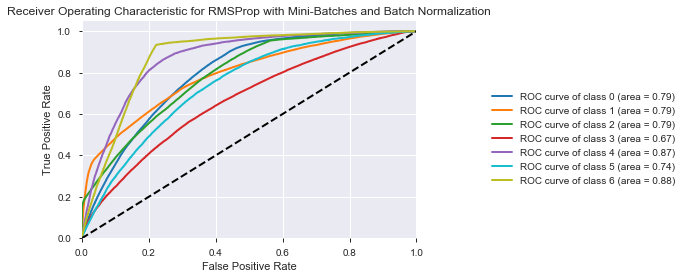

In [61]:
y_preds = three_a_three_model.predict(X_test)
roc_maker(y_preds, model_name="RMSProp with Mini-Batches and Batch Normalization")

In [62]:
print("RMSProp with Mini-Batches, and Batch Normalization Confusion Matrix:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

RMSProp with Mini-Batches, and Batch Normalization Confusion Matrix:
 [[47311  2250   221   237  1456     0   926]
 [10114 18428   368   716  6054     0  2057]
 [20803   821  5127   416   425     0   180]
 [13547  4247   301  1537  2390     0  1226]
 [ 1437  3979    54   244  8714     0  1808]
 [11643  1000   109   135   280     0   143]
 [  632  3492    29   409  5511     0  2560]]


### 3b. RMS Prop with Momentum Optimizer 

#### 3b. 1. Multilayer Perceptron with RMS Prop with Momentum Optimizer and K-Cross Validation, Mini-Batches

In [63]:
three_b_one_model = build_model()

In [64]:
three_b_one_accuracy, three_b_one_loss, *_ = kfold(three_b_one_model, optimize = 'adam', epoch=10)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 11s 36us/step - loss: 1.4910 - acc: 0.4216 - val_loss: 1.4234 - val_acc: 0.4513
Epoch 2/10
308005/308005 [==============================] - 11s 36us/step - loss: 1.4399 - acc: 0.4472 - val_loss: 1.4185 - val_acc: 0.4543
Epoch 3/10
308005/308005 [==============================] - 12s 39us/step - loss: 1.4325 - acc: 0.4491 - val_loss: 1.4092 - val_acc: 0.4553
Epoch 4/10
308005/308005 [==============================] - 12s 40us/step - loss: 1.4283 - acc: 0.4498 - val_loss: 1.4085 - val_acc: 0.4572
Epoch 5/10
308005/308005 [==============================] - 11s 37us/step - loss: 1.4250 - acc: 0.4497 - val_loss: 1.4028 - val_acc: 0.4585
Epoch 6/10
308005/308005 [==============================] - 11s 37us/step - loss: 1.4227 - acc: 0.4504 - val_loss: 1.4059 - val_acc: 0.4591
Epoch 7/10
308005/308005 [==============================] - 13s 41us/step - loss: 1.4206 - acc: 0.451

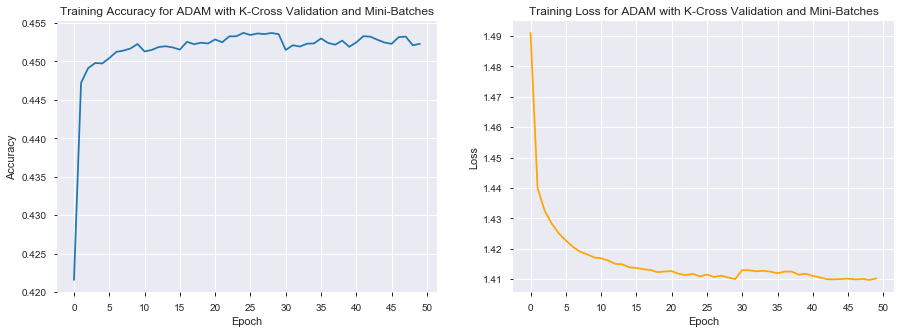

In [65]:
plot_metrics(three_b_one_accuracy, three_b_one_loss, epochs=10, 
             model_name = "ADAM with K-Cross Validation and Mini-Batches")

In [66]:
three_b_one_model.predict(X_test)[0]

array([0.49382955, 0.09810831, 0.15470262, 0.07297496, 0.00592009,
       0.17145564, 0.00300887], dtype=float32)

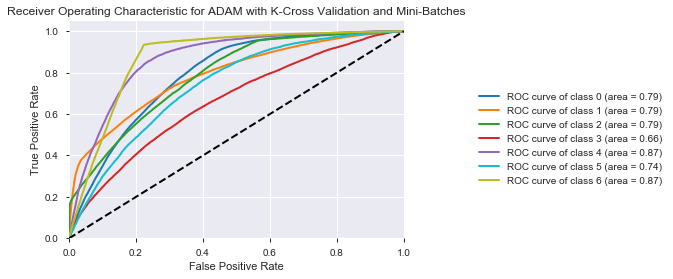

In [67]:
y_preds = three_b_one_model.predict(X_test)
roc_maker(y_preds, model_name="ADAM with K-Cross Validation and Mini-Batches")

In [68]:
print("ADAM with K-Cross Validation and Mini-Batches Confusion Matrix:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

ADAM with K-Cross Validation and Mini-Batches Confusion Matrix:
 [[47329  2153   208   295   677     0  1739]
 [10136 18827   313   910  3293     0  4258]
 [20789   857  5073   460   226     0   367]
 [13536  4270   312  1710  1094     0  2326]
 [ 1445  4580    54   332  5624     0  4201]
 [11647   977   118   160   122     0   286]
 [  634  3874    25   499  2869     0  4732]]


#### 3b. 2. Multilayer Perceptron with RMS Prop with Momentum Optimizer and K-Cross Validation,  Batch Normalization

In [69]:
three_b_two_model = build_model(BatchNorm = True)

In [70]:
three_b_two_accuracy, three_b_two_loss, *_ = kfold(three_b_two_model, optimize = 'adam', epoch=10, batchsize=None)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 53s 173us/step - loss: 1.4742 - acc: 0.4381 - val_loss: 1.4181 - val_acc: 0.4530
Epoch 2/10
308005/308005 [==============================] - 51s 167us/step - loss: 1.4400 - acc: 0.4469 - val_loss: 1.4078 - val_acc: 0.4569
Epoch 3/10
308005/308005 [==============================] - 52s 168us/step - loss: 1.4327 - acc: 0.4489 - val_loss: 1.4057 - val_acc: 0.4560
Epoch 4/10
308005/308005 [==============================] - 52s 168us/step - loss: 1.4284 - acc: 0.4503 - val_loss: 1.4034 - val_acc: 0.4577
Epoch 5/10
308005/308005 [==============================] - 52s 170us/step - loss: 1.4268 - acc: 0.4503 - val_loss: 1.4011 - val_acc: 0.4553
Epoch 6/10
308005/308005 [==============================] - 52s 170us/step - loss: 1.4242 - acc: 0.4510 - val_loss: 1.3986 - val_acc: 0.4576
Epoch 7/10
308005/308005 [==============================] - 52s 169us/step - loss: 1.4232 - acc

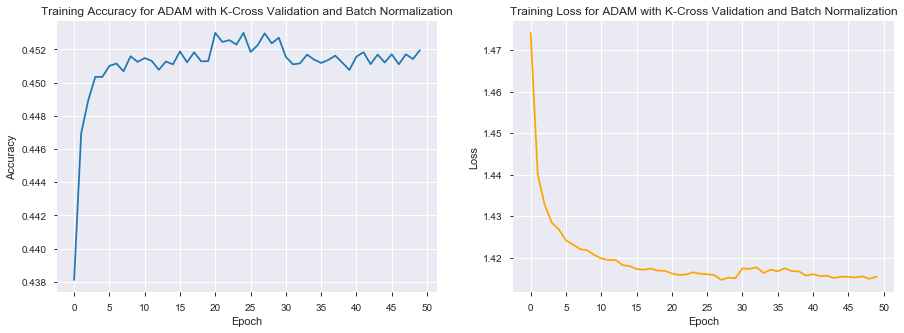

In [71]:
plot_metrics(three_b_two_accuracy, three_b_two_loss, epochs=10, 
             model_name = "ADAM with K-Cross Validation and Batch Normalization")

In [72]:
three_b_two_model.predict(X_test)[0]

array([0.49628067, 0.09342054, 0.17205484, 0.08302795, 0.00615304,
       0.14648503, 0.00257792], dtype=float32)

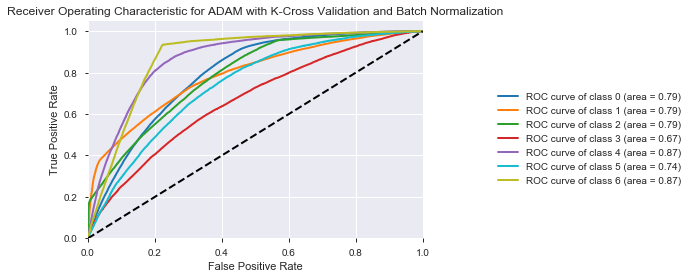

In [73]:
y_preds = three_b_two_model.predict(X_test)
roc_maker(y_preds, model_name="ADAM with K-Cross Validation and Batch Normalization")

In [74]:
print("ADAM with K-Cross Validation and Batch-Normalization Confusion Matrix:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

ADAM with K-Cross Validation and Batch-Normalization Confusion Matrix:
 [[47359  2224   184   302   797     0  1535]
 [10150 19098   300   895  4082     0  3212]
 [20809   871  5063   469   285     0   275]
 [13559  4592   278  1672  1490     0  1657]
 [ 1445  4776    50   281  6518     0  3166]
 [11655  1005   106   167   177     0   200]
 [  632  4151    26   456  3619     0  3749]]


#### 3b. 3. Multilayer Perceptron with RMS Prop with Momentum Optimizer and K-Cross Validation, Mini-batches, and Batch Normalization

In [75]:
three_b_three_model = build_model(BatchNorm = True)

In [76]:
three_b_three_accuracy, three_b_three_loss, *_ = kfold(three_b_three_model, optimize = 'adam', epoch=10)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 28s 92us/step - loss: 1.4939 - acc: 0.4312 - val_loss: 1.4196 - val_acc: 0.4505
Epoch 2/10
308005/308005 [==============================] - 23s 75us/step - loss: 1.4390 - acc: 0.4475 - val_loss: 1.4069 - val_acc: 0.4568
Epoch 3/10
308005/308005 [==============================] - 22s 72us/step - loss: 1.4291 - acc: 0.4494 - val_loss: 1.4044 - val_acc: 0.4599
Epoch 4/10
308005/308005 [==============================] - 22s 73us/step - loss: 1.4241 - acc: 0.4507 - val_loss: 1.4000 - val_acc: 0.4559
Epoch 5/10
308005/308005 [==============================] - 22s 73us/step - loss: 1.4212 - acc: 0.4508 - val_loss: 1.3995 - val_acc: 0.4564
Epoch 6/10
308005/308005 [==============================] - 28s 89us/step - loss: 1.4189 - acc: 0.4513 - val_loss: 1.3973 - val_acc: 0.4585
Epoch 7/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4174 - acc: 0.452

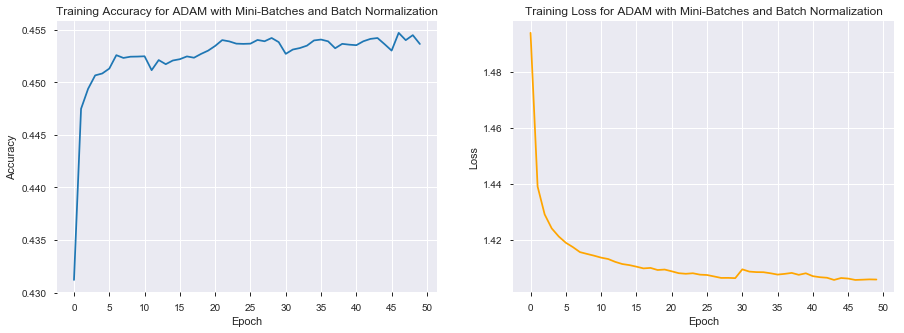

In [77]:
plot_metrics(three_b_three_accuracy, three_b_three_loss, epochs=10, 
             model_name = "ADAM with Mini-Batches and Batch Normalization")

In [78]:
three_b_three_model.predict(X_test)[0]

array([0.5184187 , 0.07946839, 0.17129491, 0.07673524, 0.00473776,
       0.14752859, 0.00181639], dtype=float32)

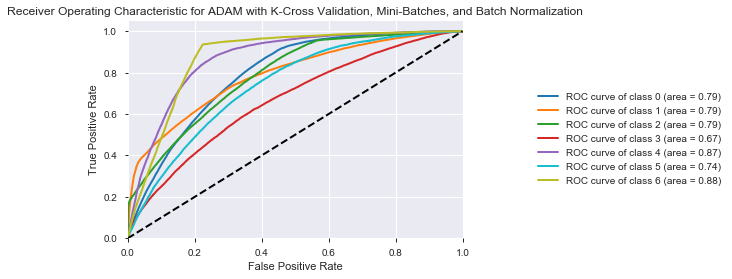

In [79]:
y_preds = three_b_three_model.predict(X_test)
roc_maker(y_preds, model_name="ADAM with K-Cross Validation, Mini-Batches, and Batch Normalization")

In [80]:
print("ADAM with K-Cross Validation, Mini-Batches, and Batch-Normalization Confusion Matrix:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

ADAM with K-Cross Validation, Mini-Batches, and Batch-Normalization Confusion Matrix:
 [[46944  2287   598   356  1517     0   699]
 [ 9972 18716   435  1453  5616     0  1545]
 [20394   866  5456   500   415     0   141]
 [13257  4078   581  2318  2141     0   873]
 [ 1344  4466   148   648  8336     0  1294]
 [11586   982   171   222   242     0   107]
 [  607  3769    47   944  5319     0  1947]]


### 3c. AdaMax Optimizer 

#### 3c. 1. Multilayer Perceptron with AdaMax Optimizer and K-Cross Validation, Mini-Batches

In [81]:
three_c_one_model = build_model()

In [82]:
three_c_one_accuracy, three_c_one_loss, *_ = kfold(three_c_one_model, optimize = 'adamax', epoch=10)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 13s 41us/step - loss: 1.4977 - acc: 0.4181 - val_loss: 1.4269 - val_acc: 0.4518
Epoch 2/10
308005/308005 [==============================] - 13s 42us/step - loss: 1.4437 - acc: 0.4463 - val_loss: 1.4196 - val_acc: 0.4525
Epoch 3/10
308005/308005 [==============================] - 12s 38us/step - loss: 1.4368 - acc: 0.4477 - val_loss: 1.4170 - val_acc: 0.4549
Epoch 4/10
308005/308005 [==============================] - 11s 36us/step - loss: 1.4321 - acc: 0.4493 - val_loss: 1.4106 - val_acc: 0.4548
Epoch 5/10
308005/308005 [==============================] - 11s 36us/step - loss: 1.4288 - acc: 0.4494 - val_loss: 1.4087 - val_acc: 0.4576
Epoch 6/10
308005/308005 [==============================] - 11s 36us/step - loss: 1.4263 - acc: 0.4495 - val_loss: 1.4062 - val_acc: 0.4564
Epoch 7/10
308005/308005 [==============================] - 11s 36us/step - loss: 1.4240 - acc: 0.451

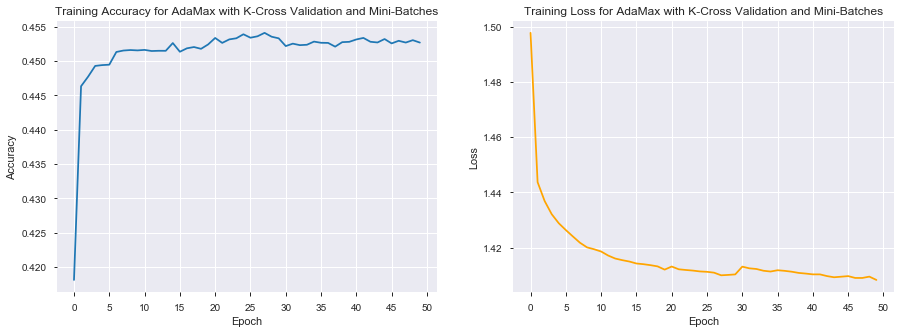

In [83]:
plot_metrics(three_c_one_accuracy, three_c_one_loss, epochs=10, 
             model_name = "AdaMax with K-Cross Validation and Mini-Batches")

In [84]:
three_c_one_model.predict(X_test)[0]

array([0.5065602 , 0.08754978, 0.174061  , 0.07577594, 0.00588483,
       0.14753543, 0.00263279], dtype=float32)

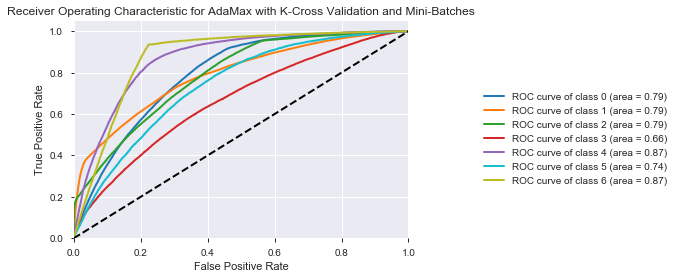

In [85]:
y_preds = three_c_one_model.predict(X_test)
roc_maker(y_preds, model_name="AdaMax with K-Cross Validation and Mini-Batches")

In [86]:
print("AdaMax with K-Cross Validation and Mini-Batches Confusion Matrix:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

AdaMax with K-Cross Validation and Mini-Batches Confusion Matrix:
 [[47126  2056   438   331   737     0  1713]
 [10058 18262   392  1418  3614     0  3993]
 [20560   797  5316   502   268     0   329]
 [13389  3690   474  2190  1225     0  2280]
 [ 1394  4338   106   559  5989     0  3850]
 [11630   891   138   234   148     0   269]
 [  619  3389    39   856  3191     0  4539]]


#### 3c. 2. Multilayer Perceptron with AdaMax Optimizer and K-Cross Validation, Batch Normalization

In [87]:
three_c_two_model = build_model(BatchNorm = True)

In [88]:
three_c_two_accuracy, three_c_two_loss, *_ = kfold(three_c_two_model, optimize = 'adamax', epoch=10, batchsize=None)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 52s 168us/step - loss: 1.4845 - acc: 0.4338 - val_loss: 1.4140 - val_acc: 0.4556
Epoch 2/10
308005/308005 [==============================] - 51s 165us/step - loss: 1.4408 - acc: 0.4472 - val_loss: 1.4090 - val_acc: 0.4565
Epoch 3/10
308005/308005 [==============================] - 51s 164us/step - loss: 1.4335 - acc: 0.4484 - val_loss: 1.4046 - val_acc: 0.4570
Epoch 4/10
308005/308005 [==============================] - 51s 165us/step - loss: 1.4312 - acc: 0.4494 - val_loss: 1.4029 - val_acc: 0.4559
Epoch 5/10
308005/308005 [==============================] - 51s 165us/step - loss: 1.4278 - acc: 0.4491 - val_loss: 1.4019 - val_acc: 0.4572
Epoch 6/10
308005/308005 [==============================] - 51s 165us/step - loss: 1.4256 - acc: 0.4504 - val_loss: 1.3998 - val_acc: 0.4582
Epoch 7/10
308005/308005 [==============================] - 51s 166us/step - loss: 1.4246 - acc

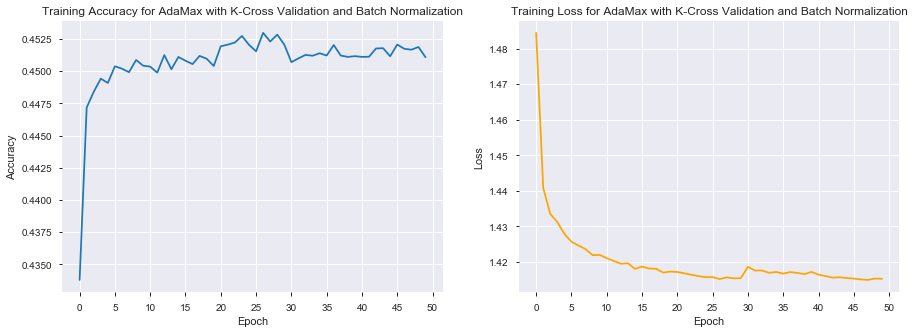

In [89]:
plot_metrics(three_c_two_accuracy, three_c_two_loss, epochs=10, 
             model_name = "AdaMax with K-Cross Validation and Batch Normalization")

In [90]:
three_c_two_model.predict(X_test)[0]

array([0.49423492, 0.07684772, 0.17935672, 0.08303881, 0.00570494,
       0.15805905, 0.00275785], dtype=float32)

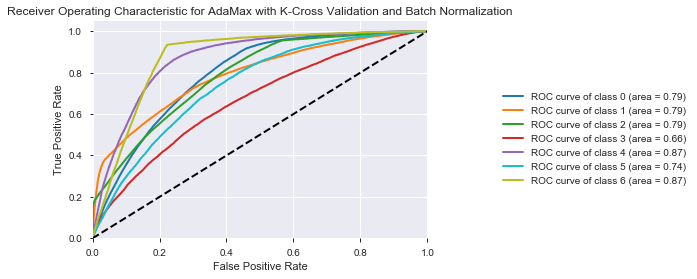

In [91]:
y_preds = three_c_two_model.predict(X_test)
roc_maker(y_preds, model_name="AdaMax with K-Cross Validation and Batch Normalization")

In [92]:
print("AdaMax with K-Cross Validation and Batch Normalization Confusion Matrix:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

AdaMax with K-Cross Validation and Batch Normalization Confusion Matrix:
 [[47357  2206   180   232   726     0  1700]
 [10152 19375   282   432  3790     0  3706]
 [20807   891  5059   425   266     0   324]
 [13559  4914   275  1126  1398     0  1976]
 [ 1449  4798    45    67  6236     0  3641]
 [11656  1035   107   118   152     0   242]
 [  634  4184    25   118  3387     0  4285]]


#### 3c. 3. Multilayer Perceptron with AdaMax Optimizer and K-Cross Validation, Mini-Batches, and Batch Normalization

In [93]:
three_c_three_model = build_model(BatchNorm = True)

In [94]:
three_c_three_accuracy, three_c_three_loss, *_ = kfold(three_c_three_model, optimize = 'adamax', epoch=10)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.5073 - acc: 0.4267 - val_loss: 1.4282 - val_acc: 0.4502
Epoch 2/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4447 - acc: 0.4464 - val_loss: 1.4133 - val_acc: 0.4560
Epoch 3/10
308005/308005 [==============================] - 21s 68us/step - loss: 1.4325 - acc: 0.4489 - val_loss: 1.4068 - val_acc: 0.4579
Epoch 4/10
308005/308005 [==============================] - 21s 67us/step - loss: 1.4264 - acc: 0.4499 - val_loss: 1.4009 - val_acc: 0.4566
Epoch 5/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4221 - acc: 0.4508 - val_loss: 1.3988 - val_acc: 0.4579
Epoch 6/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4204 - acc: 0.4519 - val_loss: 1.3980 - val_acc: 0.4593
Epoch 7/10
308005/308005 [==============================] - 20s 66us/step - loss: 1.4182 - acc: 0.451

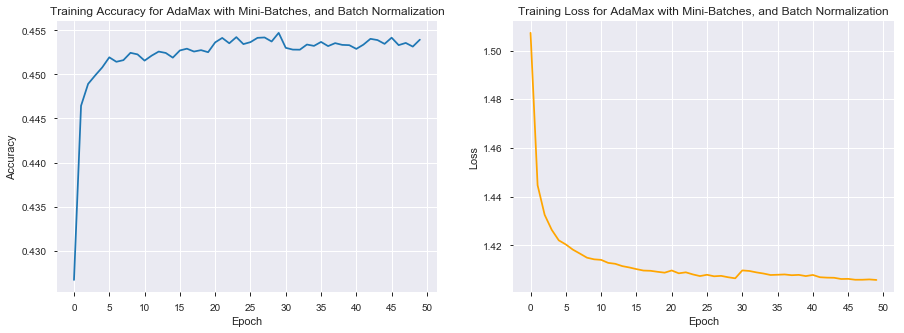

In [95]:
plot_metrics(three_c_three_accuracy, three_c_three_loss, epochs=10, 
             model_name = "AdaMax with Mini-Batches, and Batch Normalization")

In [96]:
three_c_three_model.predict(X_test)[0]

array([0.49674767, 0.08284303, 0.16077344, 0.07340085, 0.00482165,
       0.17931631, 0.00209704], dtype=float32)

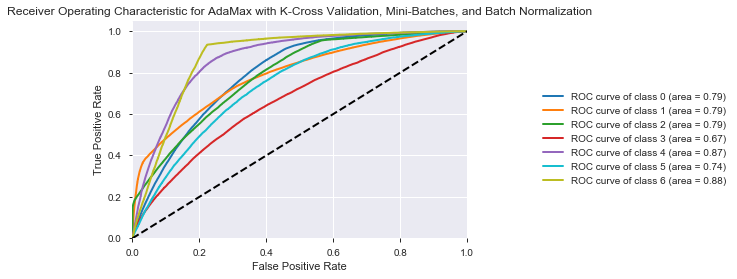

In [97]:
y_preds = three_c_three_model.predict(X_test)
roc_maker(y_preds, model_name="AdaMax with K-Cross Validation, Mini-Batches, and Batch Normalization")

In [98]:
print("AdaMax with K-Cross Validation, Mini-Batches, and Batch Normalization Confusion Matrix:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

AdaMax with K-Cross Validation, Mini-Batches, and Batch Normalization Confusion Matrix:
 [[47167  2259   371   322  1462     0   820]
 [10047 18910   381  1106  5484     0  1809]
 [20610   867  5259   480   394     0   162]
 [13409  4349   427  1963  2045     0  1055]
 [ 1393  4581   101   444  8173     0  1544]
 [11624  1007   135   183   233     0   128]
 [  620  3957    37   662  5114     0  2243]]


### 4. Improving The Model

In [103]:
from keras.optimizers import RMSprop

In [104]:
def compile_fit_model_four(model, X_train=X_train, y_train=y_train, batchsize = None, epoch=5, optimize='sgd', class_weight=None):
    model.compile(loss='categorical_crossentropy', optimizer=optimize, metrics=['accuracy'])
    
    return model.fit(X_train, y_train, epochs=epoch, verbose=1, validation_split=0.1, batch_size = batchsize, class_weight=class_weight)    

def evaluate_model_four(model, X_test=X_test, y_test=y_test):
    return model.evaluate(X_test, y_test)

def kfold_four(model, X_train=X_train, y_train=y_train, splits=5, optimize = 'sgd', epoch=4, batchsize=256, class_weight=None):
    cvscores = []
    kf = KFold(n_splits=splits)
    k = 1
    accuracy = []
    loss = []
    for train_i, val_i in kf.split(X_train, [np.argmax(t) for t in y_train]):
        print(f"\nFold {k}")
        k += 1
        history = compile_fit_model_four(model, X_train[train_i], y_train[train_i], batchsize=batchsize, optimize=optimize, epoch=epoch, class_weight=class_weight)
        _, cvaccuracy = evaluate_model_four(model, X_train[val_i], y_train[val_i])
        accuracy.extend(history.history['acc'])
        loss.extend(history.history['loss'])
        cvscores.append(cvaccuracy)
    return accuracy, loss, cvscores, np.mean(cvscores), np.std(cvscores)

In [109]:
four_model = build_model(dropout=0.05, BatchNorm = True, layer_widths = [64, 64, 64, 128, 128, 128])

four_accuracy, four_loss, *_ = kfold_four(four_model, optimize = RMSprop(lr=0.00001), epoch=10)


Fold 1
Train on 308005 samples, validate on 34223 samples
Epoch 1/10
308005/308005 [==============================] - 21s 67us/step - loss: 1.8483 - acc: 0.3068 - val_loss: 1.5816 - val_acc: 0.4181
Epoch 2/10
308005/308005 [==============================] - 21s 69us/step - loss: 1.6170 - acc: 0.3960 - val_loss: 1.4990 - val_acc: 0.4416
Epoch 3/10
308005/308005 [==============================] - 24s 78us/step - loss: 1.5471 - acc: 0.4161 - val_loss: 1.4623 - val_acc: 0.4440
Epoch 4/10
308005/308005 [==============================] - 21s 70us/step - loss: 1.5145 - acc: 0.4245 - val_loss: 1.4468 - val_acc: 0.4451
Epoch 5/10
308005/308005 [==============================] - 22s 70us/step - loss: 1.4949 - acc: 0.4297 - val_loss: 1.4390 - val_acc: 0.4458
Epoch 6/10
308005/308005 [==============================] - 22s 71us/step - loss: 1.4849 - acc: 0.4330 - val_loss: 1.4341 - val_acc: 0.4470
Epoch 7/10
308005/308005 [==============================] - 23s 75us/step - loss: 1.4760 - acc: 0.436

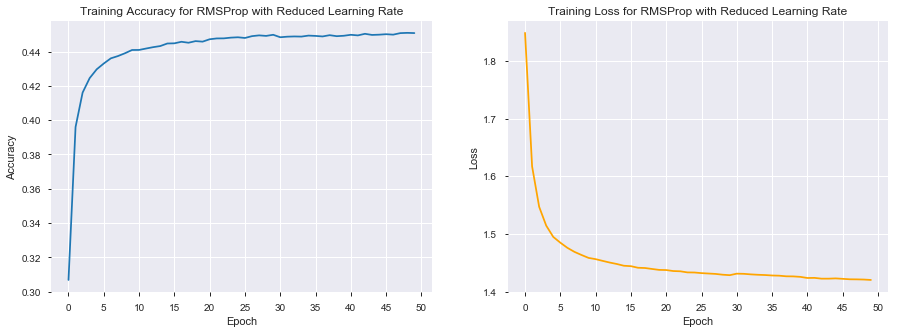

In [110]:
plot_metrics(four_accuracy, four_loss, epochs=10, 
             model_name = "RMSProp with Reduced Learning Rate")

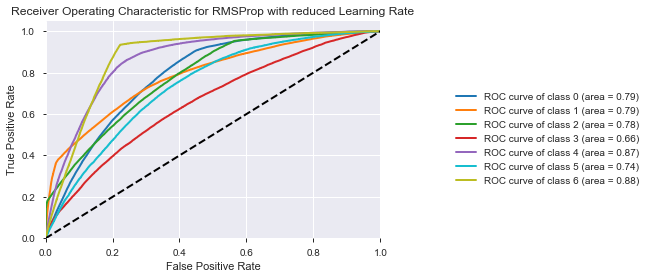

In [111]:
y_preds = four_model.predict(X_test)
roc_maker(y_preds, model_name="RMSProp with reduced Learning Rate")

In [112]:
print("RMSProp with Reduced Learning Rate:\n", 
      metrics.confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

RMSProp with Reduced Learning Rate:
 [[47346  2014   201   331  1091     0  1418]
 [10178 16745   339   965  5173     0  4337]
 [20827   696  5097   439   390     0   323]
 [13576  2899   299  1735  2062     0  2677]
 [ 1456  3054    48   378  7485     0  3815]
 [11664   821   107   161   235     0   322]
 [  637  1991    28   525  4700     0  4752]]


### 5. Model Comparison

#### Model Comparisons

([<matplotlib.axis.XTick at 0x1d0c932898>,
 <a list of 11 Text xticklabel objects>)

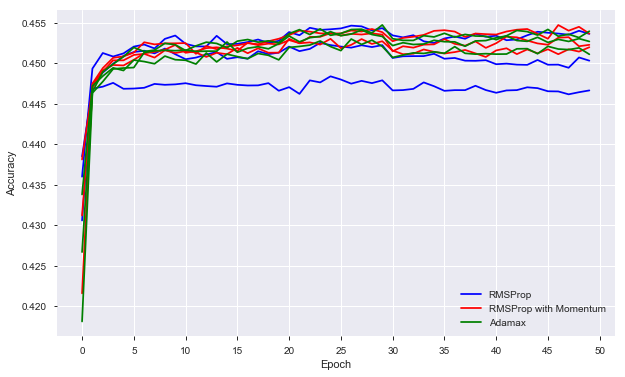

In [113]:
epochs = 50

fig = plt.figure(figsize=(10,6))

ax = plt.subplot(111)
# ax1.set_title(f'Training Accuracy for {model_name}')
ax.plot(list(range(50)), three_a_one_accuracy, label = 'RMSProp', color = 'blue')
ax.plot(list(range(50)), three_a_two_accuracy, color = 'blue')
ax.plot(list(range(50)), three_a_three_accuracy, color = 'blue')
ax.plot(list(range(50)), three_b_one_accuracy, label = 'RMSProp with Momentum', color = 'red')
ax.plot(list(range(50)), three_b_two_accuracy, color = 'red')
ax.plot(list(range(50)), three_b_three_accuracy, color = 'red')
ax.plot(list(range(50)), three_c_one_accuracy, label = 'Adamax', color = 'green')
ax.plot(list(range(50)), three_c_two_accuracy, color = 'green')
ax.plot(list(range(50)), three_c_three_accuracy, color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(list(range(0, epochs + 1, 5)))